In [1]:
import pandas as pd
import numpy as np
from numpy.random import choice
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

In [3]:
import matplotlib 
matplotlib.rcParams["font.size"] = 16

In [4]:
# ignore this cell - it makes the emphasized text red and uses the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

<img src="coins.png">

## Which sequence of coins was generated *randomly*?  Which was *handpicked* with the goal of tricking you?

In [5]:
# Write your guess in this cell
2

2

----
### Random selection from a list
- choice([\<option1\>, \<option2\> \<...\>])

In [6]:
choice(["rock", "paper", "scissors"])

'scissors'

----
### Make lots of choices 

In [7]:
choice(["rock", "paper", "scissors"], size = 5)

array(['paper', 'rock', 'rock', 'rock', 'scissors'], dtype='<U8')

In [8]:
type(choice(["rock", "paper", "scissors"], size = 5))

numpy.ndarray

In [9]:
outcomes = choice(["rock", "paper", "scissors"], size = 5)
outcomes

array(['rock', 'scissors', 'rock', 'paper', 'rock'], dtype='<U8')

In [10]:
outcomes[2]

'rock'

----
### Random series

In [11]:
Series(choice(["rock", "paper", "scissors"], size = 5))

0       paper
1       paper
2    scissors
3       paper
4    scissors
dtype: object

----
### Multidimensional random Series
- choice(["rock", "paper", "scissors"], size = (ROWS, COLUMNS))
- size = (ROWS, COLUMNS))

In [12]:
outcomes = choice(["rock", "paper", "scissors"], size = (5, 2))
outcomes

array([['paper', 'scissors'],
       ['paper', 'rock'],
       ['scissors', 'scissors'],
       ['rock', 'scissors'],
       ['paper', 'rock']], dtype='<U8')

In [13]:
outcomes[2][1]

'scissors'

In [14]:
#DataFrame(LIST of LISTS)
DataFrame(choice(["rock", "paper", "scissors"], size = (5, 2)))

,0,1
0,rock,scissors
1,paper,scissors
2,paper,rock
3,scissors,rock
4,rock,paper


----
### Exploring Bias - is this fair?

paper       6
scissors    5
rock        4
dtype: int64


<AxesSubplot:>

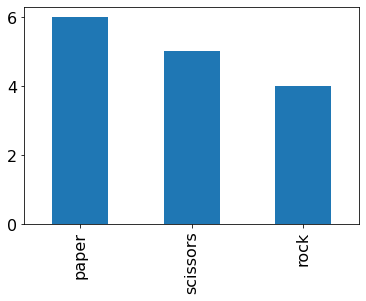

In [15]:
s = Series(choice(["rock", "paper", "scissors"], size = 15))
vc = s.value_counts()
print(vc)
vc.plot.bar()

----
### Sort by item

<AxesSubplot:>

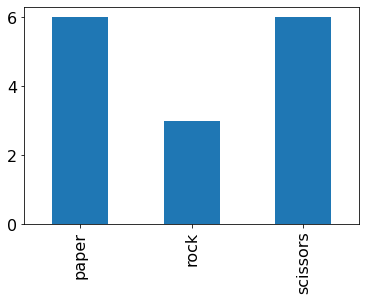

In [16]:
s = Series(choice(["rock", "paper", "scissors"], size = 15))
vc = s.value_counts()
vc = vc.sort_index()
vc.plot.bar()

----
### Sorted as "rock", "paper", "scissors"

rock        4
paper       3
scissors    8
dtype: int64


<AxesSubplot:>

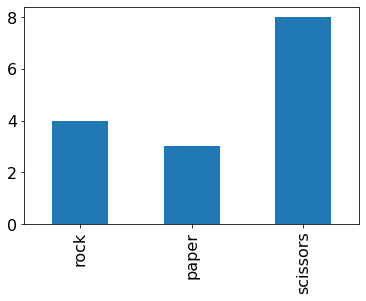

In [17]:
s = Series(choice(["rock", "paper", "scissors"], size = 15))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Is this really fair? 

rock        1000757
paper        998680
scissors    1000563
dtype: int64


<AxesSubplot:>

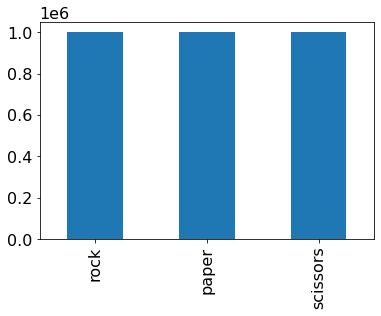

In [18]:
s = Series(choice(["rock", "paper", "scissors"], size = 3000000))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Control the probability of selection

rock         30248
paper        59845
scissors    209907
dtype: int64


<AxesSubplot:>

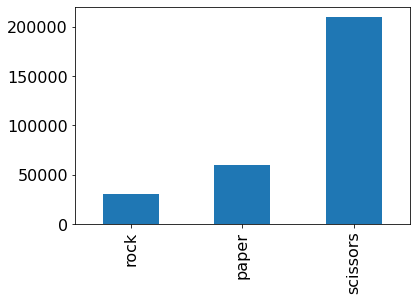

In [19]:
s = Series(choice(["rock", "paper", "scissors"], size = 300000, p = [0.10, 0.20, 0.70]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Random integer shortcut

In [20]:
Series(choice(6, size = 5))

0    4
1    3
2    1
3    1
4    1
dtype: int64

----
### Back to PowerPoint to talk about Bugs

----
### Change over time

0    0
1    2
2    9
3    3
4    9
dtype: int64


<ipython-input-21-8758817593b1>:5: RuntimeWarning: divide by zero encountered in long_scalars
  diff = 100 * (s[i] / s[i-1] -1)


<AxesSubplot:>

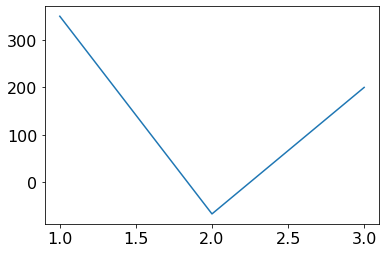

In [21]:
# Change over time
s = Series(choice(10,size=5))
percents = []
for i in range(1, len(s)):
    diff = 100 * (s[i] / s[i-1] -1)
    percents.append(diff)
print(s)
Series(percents).plot.line()

----
### Back to PowerPoint again - more about Bugs

----
### Seeding

In [22]:
np.random.seed(220)
choice(1000, size = 3)

array([883, 732,  15])

In [23]:
choice(1000, size = 3)

array([180, 120, 514])

In [24]:
np.random.seed(220)
choice(1000, size = 6)

array([883, 732,  15, 180, 120, 514])

In [25]:
choice(1000, size = 3)

array([112, 626,  27])

----
### Seeding with time

In [26]:
import time
time.time()
now = int(time.time())
now
np.random.seed(now)
choice(1000, size=3)
print("Seeding with:", now)

Seeding with: 1619721324


----
### Significance - Does the data support drawing that conclusion?

----
### Is it weird that we have 60 heads, 40 tails? How often are we +- 10 of the expected

In [27]:
trials = 10
flips = 3
df = DataFrame(choice(["H", "T"], size = (trials, flips)))
df

,0,1,2
0,T,T,T
1,T,H,H
2,H,H,T
3,T,H,H
4,T,T,T
5,H,H,H
6,T,H,T
7,H,H,T
8,T,T,H
9,T,H,H


In [28]:
trials = 10
flips = 3
df = DataFrame(choice([1, 0], size = (trials, flips)))
df

,0,1,2
0,1,0,0
1,1,0,1
2,1,0,0
3,1,1,0
4,0,0,0
5,0,1,0
6,0,0,1
7,1,1,1
8,0,1,1
9,0,0,0


In [29]:
trials = 10
flips = 3
df = DataFrame(choice([1, 0], size = (trials, flips)))
df

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,1,1
5,1,1,0
6,0,1,0
7,1,0,1
8,1,1,1
9,1,1,1


In [30]:
df.sum(axis = 1)

0    0
1    0
2    0
3    1
4    2
5    2
6    1
7    2
8    3
9    3
dtype: int64

In [31]:
trials = 10000
flips = 100
df = DataFrame(choice([1, 0], size = (trials, flips)))
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,1,1,1,0,0,0,0,0,1,...,1,1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,0,1,0,0,1,...,1,1,0,1,0,1,1,1,0,1
3,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,1,1,0,0,0,1,1,1,0,0,...,1,1,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,1,0,1,0,1,1,1,...,1,0,1,0,0,0,0,1,1,1
9996,0,1,0,0,1,1,0,0,0,1,...,1,1,0,0,0,0,1,1,1,0
9997,1,0,1,0,0,1,0,1,1,0,...,1,0,1,1,0,1,0,1,0,0
9998,0,1,1,1,0,0,1,1,0,0,...,0,1,1,1,0,1,1,0,0,0


In [32]:
counts = df.sum(axis = 1)
counts

0       54
1       57
2       51
3       42
4       49
        ..
9995    42
9996    51
9997    47
9998    51
9999    45
Length: 10000, dtype: int64

In [33]:
counts <= 40

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [34]:
counts [counts <= 40]

20      39
88      40
191     40
216     38
220     40
        ..
9753    40
9845    38
9884    39
9932    40
9980    40
Length: 276, dtype: int64

In [35]:
counts >= 60

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [36]:
counts [counts >= 60]

68      61
111     62
139     60
152     60
185     63
        ..
9885    65
9900    61
9908    60
9939    62
9957    67
Length: 286, dtype: int64

In [37]:
extremes = counts[ (counts <= 40) | (counts >= 60) ]
len(extremes)

562

In [38]:
len(extremes) / trials *100

5.62

----
### Opening example with the 16 coins - How often do we get 11 or more heads?

In [39]:
flips = 16
trials = 10000
df = DataFrame(choice([1, 0], size = (trials, flips)))
counts = df.sum(axis = 1)
result = counts[ counts >= 11 ]
len(result) / trials * 100

9.85

----
### How often do we see 7 heads in a row out of 16 coins

In [40]:
seven_or_more = 0
trials = 10000
for i in range(trials):
    s = "".join(choice(["H", "T"], size = 16))
    if s.find("HHHHHHH") != -1:
        seven_or_more += 1
seven_or_more / trials * 100

3.94